In [1]:
import cv2
import mediapipe as mp
import time
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import sys
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.data import Dataset

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
%run ./Funkcije.ipynb

D:\Projekat 2022


In [8]:
train_data_features_location = r'../dataset/SyntheticASLAlphabet-kNN/defining_dataset/defining_dataset_features.npy'
train_data_labels_location = r'../dataset/SyntheticASLAlphabet-kNN/defining_dataset/defining_dataset_labels.npy'
test_data_location = r'../dataset/Synthetic ASL Alphabet/Test_Alphabet/'

In [6]:
train_f = np.load(train_data_features_location)
train_l = np.load(train_data_labels_location)

In [7]:
NUM_OF_CLASSES = 24

In [6]:
def ZA_PR():
    
    cap = cv2.VideoCapture(0)

    mpHands = mp.solutions.hands
    hands = mpHands.Hands(max_num_hands = 5, static_image_mode=False, min_detection_confidence = 0.3)
    mpDraw = mp.solutions.drawing_utils


    while cap.isOpened():
        success, img = cap.read()
        img = cv2.flip(img, 1)
#         h = int(img.shape[0] * 1.5)
#         w = int(img.shape[1] * 1.5)
#         img = cv2.resize(img, (w, h))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)


        if results.multi_hand_landmarks:
            for handLms in results.multi_hand_landmarks:
                mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        cv2.imshow("VUK OVO NIJE SMISLIO", img)
        cv2.waitKey(1)
        
    cap.release()
    cv2.destroyAllWindows()

In [7]:
ZA_PR()

: 

In [8]:
train_path = 'D:\Projekat 2022\dataset\Synthetic ASL Alphabet\Train_Alphabet'
test_path = 'D:\Projekat 2022\dataset\Synthetic ASL Alphabet\Test_Alphabet'

In [9]:
max_samples = 100
min_samples = 100
img_size = (512, 512)
batch_size = 25

horizontal_flip = False
rotation_range = 0
width_shift_range = 0
height_shift_range = 0
zoom_range = 0

In [38]:
data = np.zeros((21, 21))
path = r'../dataset/SyntheticASLAlphabet-kNN/defining_dataset/'

for k in range(1, 21):

    for i in range(1, 21):
        
        
        grid_id = r'' + str(i) + 'x' + str(i) + ' grid/'
        train_data_features_location =os.path.join(path, grid_id, 'defining_dataset_features.npy') 
        train_data_labels_location =os.path.join(path, grid_id, 'defining_dataset_labels.npy') 
        test_data_features_location =os.path.join(path, grid_id, 'test_dataset_features.npy') 
        test_data_labels_location =os.path.join(path, grid_id, 'test_dataset_labels.npy') 


        # train_data_labels_location = r'../dataset/Synthetic ASL Alphabet - kNN/defining_dataset/' + r'str(i)' + r'x' + r'str(i)' + r' grid/defining_dataset_labels.npy'

        # test_data_features_location = r'../dataset/Synthetic ASL Alphabet - kNN/defining_dataset/' + str(i) + 'x' + str(i) + ' grid/test_defining_dataset_features.npy'
        # test_data_labels_location = r'../dataset/Synthetic ASL Alphabet - kNN/defining_dataset/' + str(i) + 'x' + str(i) + ' grid/test_dataset_labels.npy'


        train_f = np.load(train_data_features_location)
        train_l = np.load(train_data_labels_location)
        test_f = np.load(test_data_features_location)
        test_l = np.load(test_data_labels_location)
        
        model = KNeighborsClassifier(n_neighbors = k)

        # Train the model using the training sets
        model.fit(train_f, train_l)
        predicted= model.predict(test_f)
        acc = metrics.accuracy_score(test_l, predicted)

        data[k, i] = acc

        print('\n')
        print('grid: ' + str(i) + 'x' + str(i) + '   ' + 'k = ' + str(k) + '    acc = ' + str(acc))

np.save(path + 'accuracys', data)



grid: 1x1   k = 1    acc = 0.071875


grid: 2x2   k = 1    acc = 0.19791666666666666


grid: 3x3   k = 1    acc = 0.315625


grid: 4x4   k = 1    acc = 0.42291666666666666


grid: 5x5   k = 1    acc = 0.44166666666666665


grid: 6x6   k = 1    acc = 0.46041666666666664


grid: 7x7   k = 1    acc = 0.48854166666666665


grid: 8x8   k = 1    acc = 0.50625


grid: 9x9   k = 1    acc = 0.5135416666666667


grid: 10x10   k = 1    acc = 0.534375


grid: 11x11   k = 1    acc = 0.521875


grid: 12x12   k = 1    acc = 0.5333333333333333


grid: 13x13   k = 1    acc = 0.5291666666666667


grid: 14x14   k = 1    acc = 0.534375


grid: 15x15   k = 1    acc = 0.5447916666666667


grid: 16x16   k = 1    acc = 0.540625


grid: 17x17   k = 1    acc = 0.540625


grid: 18x18   k = 1    acc = 0.5458333333333333


grid: 19x19   k = 1    acc = 0.54375


grid: 20x20   k = 1    acc = 0.54375


grid: 1x1   k = 2    acc = 0.003125


grid: 2x2   k = 2    acc = 0.04791666666666667


grid: 3x3   k = 2    acc = 

In [28]:
from termcolor import colored

print (colored('hello', 'red'), colored('world', 'green'))

hello world


In [53]:
np.max(data)

0.5458333333333333

In [59]:
from numpy import unravel_index
unravel_index(data.argmax(), data.shape)

(1, 18)

In [5]:
matrica = np.load(os.path.join(r'D:/Projekat 2022/dataset/SyntheticASLAlphabet-kNN/defining_dataset/accuracys.npy'))

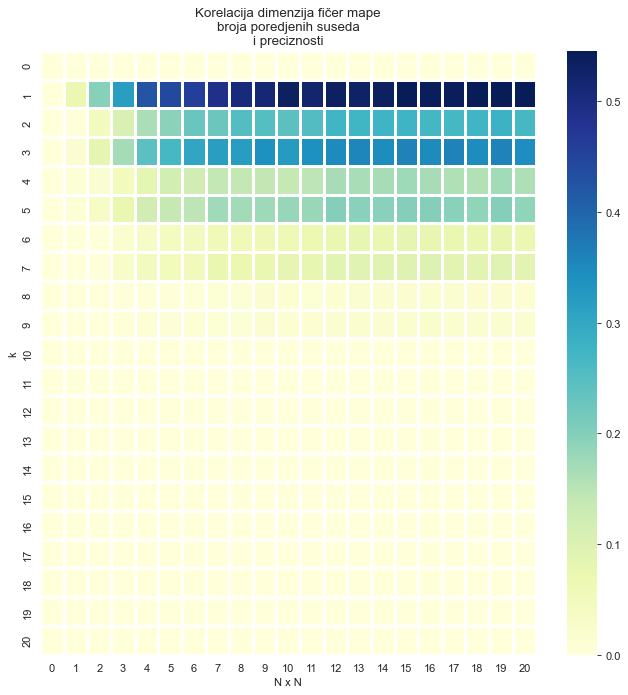

In [7]:
plt.figure(figsize=(10, 10), dpi=80)
ax = sns.heatmap(matrica, linewidth=1,  cmap="YlGnBu")

plt.xlabel("N x N")
plt.ylabel("k")
plt.title("Korelacija dimenzija fičer mape" + '\n' + "broja poredjenih suseda" + '\n' +  "i preciznosti")

plt.show()